# Customer Segmentation Using K-Means Clustering



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
data=pd.read_excel(r'M:\CUSTOMER_DETAILS.xlsx')

data


,Customer ID,Gender,Age,Annual Income (IN K$),Spending Score
0,1,F,18,8,35
1,2,M,20,6,50
2,3,M,21,8,55
3,4,M,20,8,51
4,5,F,17,5,40
5,6,M,16,4,35
6,7,M,23,12,40
7,8,F,17,8,30
8,9,M,18,8,30
9,10,F,23,12,50


Dropping the Customer ID which is not relevant in our clustering objective.

In [4]:
data.drop(["Customer ID"], axis = 1, inplace=True)

Next I made a bar plot to check the distribution of number of customers in each age group.

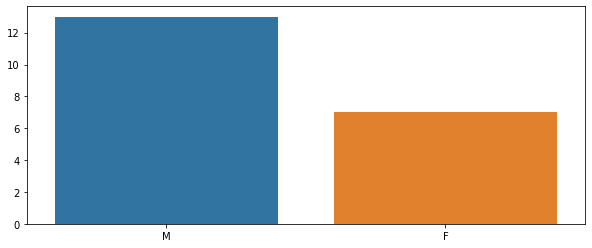

In [6]:
genders = data.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Next I made a bar plot to check the distribution of number of customers in each age group.

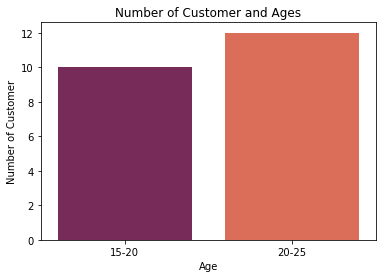

In [7]:
age15_20 = data.Age[(data.Age <= 20)]
age20_25 = data.Age[(data.Age >= 20)]

x = ["15-20","20-25"]
y = [len(age15_20.values),len(age20_25.values)]


sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Also I made a bar plot to visualize the number of customers according to their annual income.


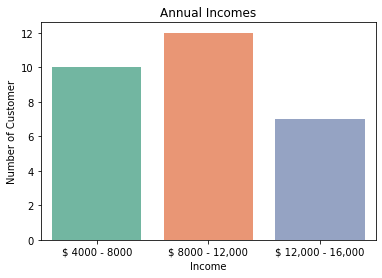

In [9]:
ai_4 = data["Annual Income (IN K$)"][(data["Annual Income (IN K$)"] >= 4) & (data["Annual Income (IN K$)"] <= 8)]
ai_8 = data["Annual Income (IN K$)"][(data["Annual Income (IN K$)"] >= 8) & (data["Annual Income (IN K$)"] <= 12)]
ai_12= data["Annual Income (IN K$)"][(data["Annual Income (IN K$)"] >= 12) & (data["Annual Income (IN K$)"] <= 16)]

aix = ["$ 4000 - 8000", "$ 8000 - 12,000", "$ 12,000 - 16,000"]
aiy = [len(ai_4.values), len(ai_8.values), len(ai_12.values)]


sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

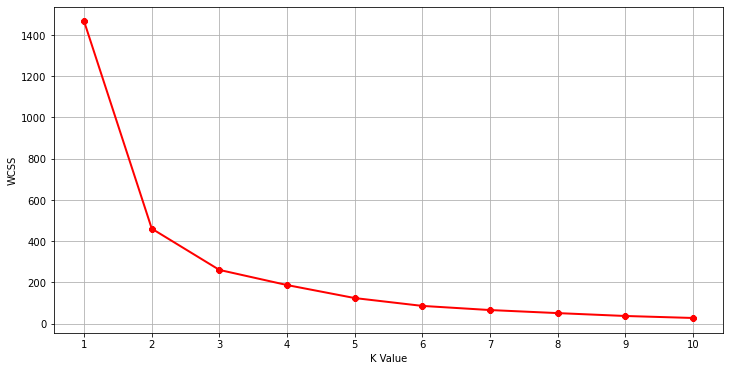

In [10]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

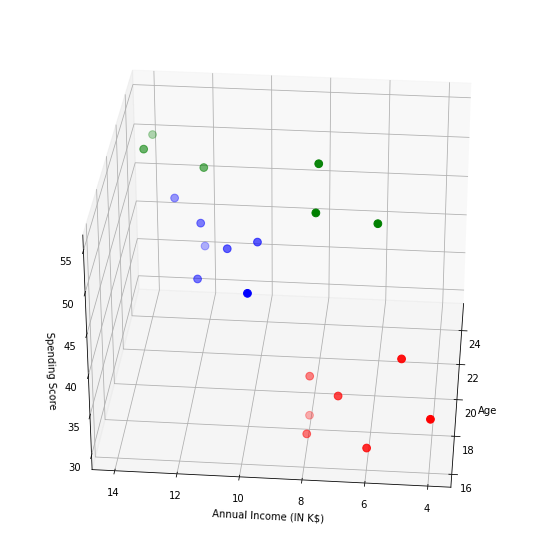

In [12]:
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=3)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (IN K$)"][data.label == 0], data["Spending Score"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (IN K$)"][data.label == 1], data["Spending Score"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (IN K$)"][data.label == 2], data["Spending Score"][data.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (IN K$)")
ax.set_zlabel('Spending Score')
plt.show()